In [1]:
# https://github.com/CoodingPenguin/nunnu-nanna-kaggle-study/blob/master/2_porto_seguro/1_porto_seguro_bertcarremans/1_porto_seguro_bertcarremans_2020-08-10.ipynb
# 소현언니 깃허브를 참고햇따

**Porto Seguro Tutorial by Bert Carrenmasn**

Porto Seguro는 브라질 자동차 보험 회사로, 이 데이터 셋을 활용하여 **어떤 차주가 내년에 보험 청구를 할 것같은지를 예측**하는 것이 목적이다.

# Loading Packages 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer # 예전버전이 없음
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectFromModel 
from sklearn.utils import shuffle 
from sklearn.ensemble import RandomForestClassifier 

# pandas에서 dataset을 볼 때 최대 100 cols까지 보게 설정
pd.set_option('display.max_columns',100)

# Loading data 

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Data at First Sight 

다음은 대회에서 첨부한 데이터셋 설명이다 :
* **유사한 집단**의 피처들은 **똑같은 피처 이름**으로 태그 된다.  
* 뒤에 bin이라는 단어 포함 시 => **binary**, 앞에 cat => **categorical**한 피처이다.   
* 위의 표시가 없는 피처들은 **continous하거나 ordinal**하다.
* -1은 결측치를 말한다.
* target 는 보험을 청구했는지 여부를 나타낸다.

아래는 내가 모르는 것 보충 설명!
> * **Categorical variables** represent types of data which may be divided into groups. Examples of categorical variables are race, sex, age group, and educational level.   
> * **Continuous data** are data which can take any values. Examples include time, height and weight. Because continuous data can take any value, there are an infinite number of possible outcomes.
> * **Ordinal data** is a kind of categorical data with a set order or scale to it. For example, ordinal data is said to have been collected when a responder inputs his/her financial happiness level on a scale of 1-10. Ordinal data is a statistical type of quantitative data in which variables exist in naturally occurring ordered categories. 

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


데이터는 다음과 같이 구성되어 있다.
* target과 id 피처
* binary 피처들
* categorical 피처들
* -1 (결측치)를 가지고 있는 피처들
* 정수 혹은 실수 값을 가지고 있는 피처들 

In [6]:
train.shape

(595212, 59)

In [7]:
#중복된 row를 제거한 dataframe 반환
train.drop_duplicates()
train.shape

(595212, 59)

중복된 데이터는 없다.  
엄청 크다ㅠㅠㅠㅠ 

In [8]:
test.shape

(892816, 58)

test가 더 크다...말이 됨....?     
test에서는 target label이 없어서 피처갯수가 58개이다.   

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

**null 데이터가 없다 => -1 인 결측치로 대체되었다.**

# Metadata 

데이터를 쉽게 다루기 위해서, DataFrame에 피처에 대한 meta 정보를 저장한다. 

아래와 같은 메타 데이터를 생성한다.
> * role : input, ID, target
> * level : nominal, interval, ordinal, binary
> * keep : True, False
> * dtype :int, float, str 

데이터의 종류
* **nominal** :하나의 카테고리로 분류가 가능하지만 순서를 매길 수 없고 그냥 셀 수만 있는 데이터   
   * 평균을 계산하는 것이 의미가 없고 비율로 표현하는 건 OK
   * ex) 여자/ 남자
* **ordinal** : 카테고리에 순서가 있는 데이터 
   * ex) 매우 낮다/낮다/중립/높다/매우 낮다
* **interval** : 하루 중 특정 시점을 나타내는 시간 데이터 
  * 데이터의 연속된 측정 구간 사이의 간격이 동일한 경우도 interval데이터라 부른다.   
  * numeric한 값을 가지므로 다양한 연산이 가능하다
  * 절대적 원점이 없다. 
* **ratio** : 절대적 원점이 존재하여 그 원점과 어떤 시점 사으이 차이
  * ex) 나이, 몸무게
* **discrete/ continous** ::연속적이냐 떨어지는 값이냐 차이.
  * interval이나 ratio 데이터는 discrete나 continous 둘 중 하나의 속성을 갖게 된다. 

In [10]:
data = [] #메타 데이터를 저장할 리스트
for f in train.columns :
    #role 설정
    if f =='target' :
        role = 'target'
    elif f == 'id' :
        role = 'id'
    else :
        role = 'input'
    
    #level 설정
    if 'bin' in f or f == 'target' :
        level = 'binary'
    elif 'cat' in f or f =='id' :
        level = 'nominal'
    elif train[f].dtype == np.float64 :
        level = 'interval'
    elif train[f].dtype == np.int64 :
        level = 'ordinal'
    
    #keep 설정
    #id 빼고는 모두 True
    keep = True
    if f =='id' :
        keep = False 
    
    #datatype 설정
    dtype = train[f].dtype 
    
    #각 피처에 대한 메타 데이터 생성 
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' :dtype
    }
    
    data.append(f_dict)

In [11]:
meta = pd.DataFrame(data,columns = ['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace = True)
meta 

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


만약 특정 성격을 가지고 있는 피처를 뽑아내고 싶다면 다음과 같이 하면된다. 다음 예시는 **nominal한 피처를 뽑아내는 경우**

In [12]:
meta[(meta.level == 'nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

다음은 role과 level에 따른 피처의 개수이다. 

In [13]:
# 1.role과 level만 추출해 role을 기준으로 grouping
# 2. 그 때 크기를 count key의 value로 둔다
# 3. 이 dict를 dataframe으로 변환
# 4. index를 다시 차례대로 부여 
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


# Descriptive Statistics 

describe() 함수를 통해 간단한 통계를 낼 수 있지만 **categorical** 피처와 id의 경우 적용 되지 않는다.(총 15개의 피처)  

이번에는 categorcal 피처를 시각화해보자 

In [14]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

## 4.1 Interval Features 

In [15]:
# interval 피처들만 추출(이름) , 시간데이터 
# 이 때 반환되는 것은 Index 객체 
v = meta[(meta.level == 'interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


관찰 결과
* **reg features**
  * ps_reg_03만 결측치가 존재한다.
  * 피처마다 최대, 최소 범위가 다르다. scaling하는 방법도 있지만 우리가 사용할 classifier에 따라 달라질 수 도 있음
* **car features**
  * ps_car_12 와 ps_car_15는 결측치가 존재한다.
  * **reg**와 마찬가지로 각 피처의 번위가 다르므로 scaling을 해볼 수 있다.
* **calc features**
  * 모든 피처에 결측치가 없다
  * 몇몇 피처가 최대값이 0.9이다.
  * 그리고 이 피처들은 매우 비슷한 분포를 가지고 있다.
  

## Ordinal Features(순서가 있는 데이터)

In [16]:
v =meta[(meta.level == 'ordinal')&(meta.keep)].index 
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* ps_car_11만 결측치가 존재한다
* 서로 범위가 다르므로 scaling 방식을 적용해 볼 수 있다. 

## Binary Features 

In [17]:
v = meta[(meta.level == 'binary')&(meta.keep)].index 
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* target == 1인 데이터가 **3.645%** 을 차지한다. 매우 극단적 불균형
* 평균에서 볼 수 있듯이 대부분의 피처들이 0에 가까운걸 볼 수 있다.   

# Handling imbalnced classes 

target ==1인 데이터가 **3.64%** 이므로 데이터 불균형 문제를 해결해야 한다. 
* 방법 1 : target ==1인 데이터를 oversampling
* 방법 2 : target == 0인 데이터를 undersampling
우리는 매우 큰 데이터 셋을 가지고 있으므로 **undersampling** 방식을 사용한다.


In [18]:
desired_apriori = 0.10 #원하는 target ==1의 비율

# 각 target value index 추출
idx_0 = train[train.target == 0].index 
idx_1 = train[train.target == 1].index

#각 target value의 데이터 개수
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])
print('train 전체 개수 {}'.format(len(train)))
print("target == 0 개수 {}, target == 1 개수{}".format(nb_0, nb_1))

# undersampling rate 
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
#undersampling 시 최종 taret ==0 갯수
undersampled_nb_0 = int(undersampling_rate*nb_0)

print('Rate to undersample records with target == 0 :{}'.format(undersampling_rate))
print('Rate of records with target = 0 after undersampling : {}'.format(undersampled_nb_0))

#target = 0의 index 중  10%을 임의로 선발
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

# 남은 index를 가지고 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)

#undersampled된 DataFrame 생성
train = train.loc[idx_list].reset_index(drop = True)

train 전체 개수 595212
target == 0 개수 573518, target == 1 개수21694
Rate to undersample records with target == 0 :0.34043569687437886
Rate of records with target = 0 after undersampling : 195246


In [21]:
train 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
216936,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
216937,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
216938,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


reset_index 위와 같이 인덱스를 다시 설정 
https://kongdols-room.tistory.com/123 

# Data Quality Checks 

## Checking Missing Values 

결측치(missing values)는 -1로 표현된다.

In [22]:
vars_with_missing = []    # missing value를 갖는 피처 리스트

for f in train.columns:
    missings = train[train[f] == -1][f].count()    # missing value 개수
    if missings > 0:
        vars_with_missing.append(f)
        # 결측치 / 전체 갯수
        missings_perc = missings / train.shape[0]  # missing value 비율
        
        print('Feature {} has {} records ({:.2%}) with missing values.'.format(f, missings, missings_perc))

print('In total, there are {} features with missing values.'.format(len(vars_with_missing)))

Feature ps_ind_02_cat has 103 records (0.05%) with missing values.
Feature ps_ind_04_cat has 51 records (0.02%) with missing values.
Feature ps_ind_05_cat has 2256 records (1.04%) with missing values.
Feature ps_reg_03 has 38580 records (17.78%) with missing values.
Feature ps_car_01_cat has 62 records (0.03%) with missing values.
Feature ps_car_02_cat has 2 records (0.00%) with missing values.
Feature ps_car_03_cat has 148367 records (68.39%) with missing values.
Feature ps_car_05_cat has 96026 records (44.26%) with missing values.
Feature ps_car_07_cat has 4431 records (2.04%) with missing values.
Feature ps_car_09_cat has 230 records (0.11%) with missing values.
Feature ps_car_11 has 1 records (0.00%) with missing values.
Feature ps_car_14 has 15726 records (7.25%) with missing values.
In total, there are 12 features with missing values.


In [23]:
train[train['ps_ind_02_cat']==-1]['ps_ind_02_cat']

8811     -1
15846    -1
19607    -1
25590    -1
26498    -1
         ..
215590   -1
215816   -1
216309   -1
216357   -1
216647   -1
Name: ps_ind_02_cat, Length: 103, dtype: int64

OBSERVATION
* ps_car_03_cat 과 ps_car_05_cat는 많은 부분이 missing value이므로 삭제
* 그외 **categorical** 피처는 -1 그대로 놔둠.
* ps_reg_03는 **continuous**한 피처로 18%가 mising value임 -> 평균값으로 채움
* ps_car_11는 **ordinal**한 피터로 단 5개의 missing value가 존재 -> 가장 많은 횟수의 값(mode)으로 채움
* ps_car_12는 **continous**한 피처로 오직 1개의 missing value가 존재 -> 평균값으로 채움 
* ps_car_14는 **coninous**한 피처로 7%가 missing value임 -> 평균값으로 채움

> class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)
numpy.ravel()
다차원 배열을 1차원 배열로 펴주는 함수
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [24]:
train['ps_reg_03'].ravel()

array([0.83815273, 0.72844011, 0.86926693, ..., 0.71195154, 0.57716982,
       1.09515981])

In [25]:
# 너무 많은 missing value를 갖고 있는 피처는 드롭!
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace= True, axis = 1)

#meta 데이터 변경  : 더이상 사용하지 않는 걸로
meta.loc[(vars_to_drop),'keep'] = False

# SimpleImputer로 mean과 mode로 채움
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## Checking the Cardinality of the Categorical Features 

Cardinality는 **전체 데이터에 대해 한 피처의 데이터 중복 정도**를 말한다. 나중에 categorical 피처의 dummy 피처를 만들 예정인데, 해당 피처가 많은 유일한(unique, distinct) 값을 가지고 있는 지 확인해주어야 한다. 왜냐하면 그 만큼의 유일수의 개수만큼 dummy 피처를 생성해줘야 하기 때문이다. 그래서 너무유일수가 많을 경우 dummy 피처를 만들지 않는다. 

In [26]:
v = meta[(meta.level =='nominal')&(meta.keep)].index 

for f in v :
    #유일수의 갯수 => 각 값의 unique() 갯수. shape[0] 은 칼럼1 라 봐야 하나?
    dist_values = train[f].value_counts().shape[0]
#     print(train[f].value_counts())
    print('Feature {} has {} distinct values '.format(f, dist_values))

Feature ps_ind_02_cat has 5 distinct values 
Feature ps_ind_04_cat has 3 distinct values 
Feature ps_ind_05_cat has 8 distinct values 
Feature ps_car_01_cat has 13 distinct values 
Feature ps_car_02_cat has 3 distinct values 
Feature ps_car_04_cat has 10 distinct values 
Feature ps_car_06_cat has 18 distinct values 
Feature ps_car_07_cat has 3 distinct values 
Feature ps_car_08_cat has 2 distinct values 
Feature ps_car_09_cat has 6 distinct values 
Feature ps_car_10_cat has 3 distinct values 
Feature ps_car_11_cat has 104 distinct values 


ps_car_11_cat만 매우 유일수를 가지고 있다. 

In [27]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(trn_series=None, tst_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    '''
    trn_series : (pd.Series) train 데이터의 categorical 피처
    tst_series : (pd.Series) test 데이터의 categorical 피처
    target : (pd.Series) target 피처
    min_samples_leaf : (int) leaf 노드가 되기 위한 최소한의 샘플 개수
    smoothing : (int) smoothing 정도
    '''
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    # 카테고리별 target의 평균과 개수를 계산
    averages = temp.groupby(by=trn_series.name)[
        target.name].agg(['mean', 'count'])
    # smoothing 계산
    smoothing = 1 / \
        (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))

    # average func을 모든 target 데이터에 적용
    prior = target.mean()
    # 개수가 많을수록 full_avg는 덜 고려됨
    averages[target.name] = prior * \
        (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)

    # averages를 train 그리고 test series에 적용
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name), averages.reset_index().rename(columns={
        'index': target.name, target.name: 'average'}), on=trn_series.name, how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name), averages.reset_index().rename(columns={
        'index': target.name, target.name: 'average'}), on=tst_series.name, how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge는 index가 없으므로 다시 생성
    ft_trn_series.index= trn_series.index
    ft_tst_series.index = tst_series.index

    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [28]:
train_encoded, test_encoded = target_encode(
train['ps_car_11_cat'],test['ps_car_11_cat'],target = train.target,min_samples_leaf=100, smoothing=10,noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded 
train.drop('ps_car_11_cat',axis =1 , inplace= True)
meta.loc['ps_car_11_cat','keep'] = False 
test['ps_cat_11_cat_te'] = test_encoded 
test.drop('ps_car_11_cat',axis = 1, inplace = True)

In [29]:
train['ps_car_11_cat_te']

0         0.094514
1         0.122616
2         0.095627
3         0.086043
4         0.106674
            ...   
216935    0.120792
216936    0.113506
216937    0.121395
216938    0.121032
216939    0.068004
Name: ps_car_11_cat_te, Length: 216940, dtype: float64

## Testing with ps_car_11_cat

In [30]:
#데이터 로드
trn_df = pd.read_csv('../data/train.csv',index_col=0)
sub_df = pd.read_csv('../data/test.csv',index_col=0)

#target이 ps_car_11_cat을 encoding
trn, sub = target_encode(trn_df['ps_car_11_cat'],sub_df['ps_car_11_cat'],target=trn_df.target, min_samples_leaf=100, smoothing=10, noise_level=0.01)
trn.head(10)

id
7     0.038659
9     0.024122
13    0.031357
16    0.044891
17    0.025882
19    0.044350
20    0.022980
22    0.030944
26    0.034649
28    0.045220
Name: ps_car_11_cat_mean, dtype: float64

In [31]:
# trn.unique().shape[0]
trn.value_counts().shape[0]

595212

 ps_car_11_cat 만 매우 유일수가 크니까 이지랄 한거아냐... 근데 유일수를 줄여줬다기 보단,  ps_car_11_cat값이 워낙 크니까 크기를 스케일링 해줬다고 보는데... 함수 돌리니까 ....유일수 값이 행 갯수 만큼 늘어났는데...? 뭐여 ㅅㅂ

# Exploratory Data Visualization 

## Categorical Features 

<Figure size 432x288 with 0 Axes>

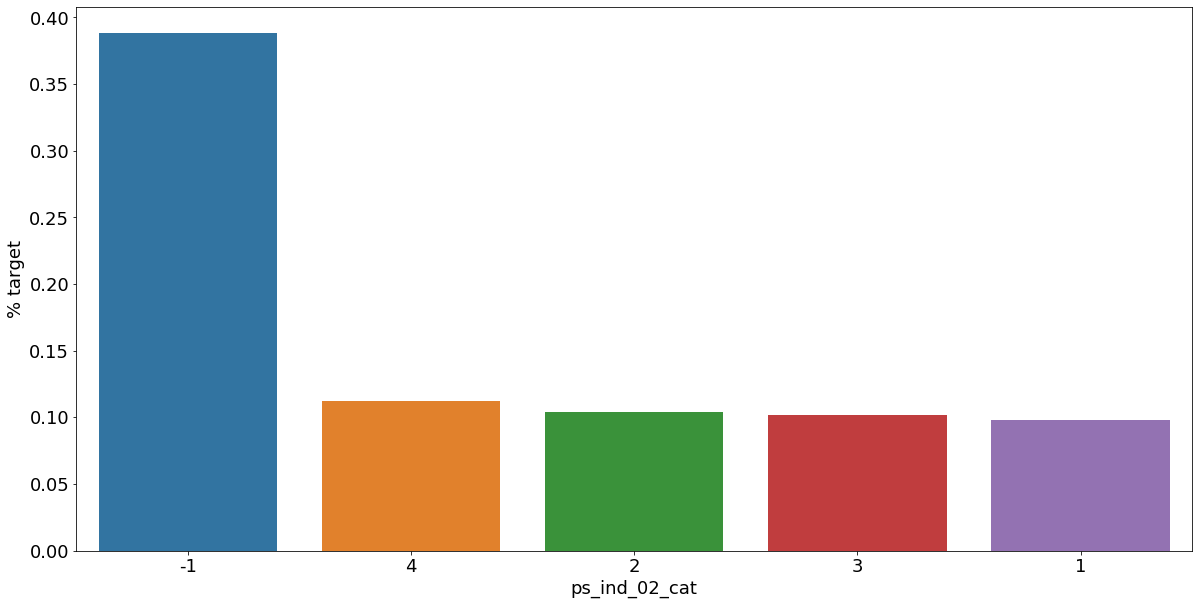

<Figure size 432x288 with 0 Axes>

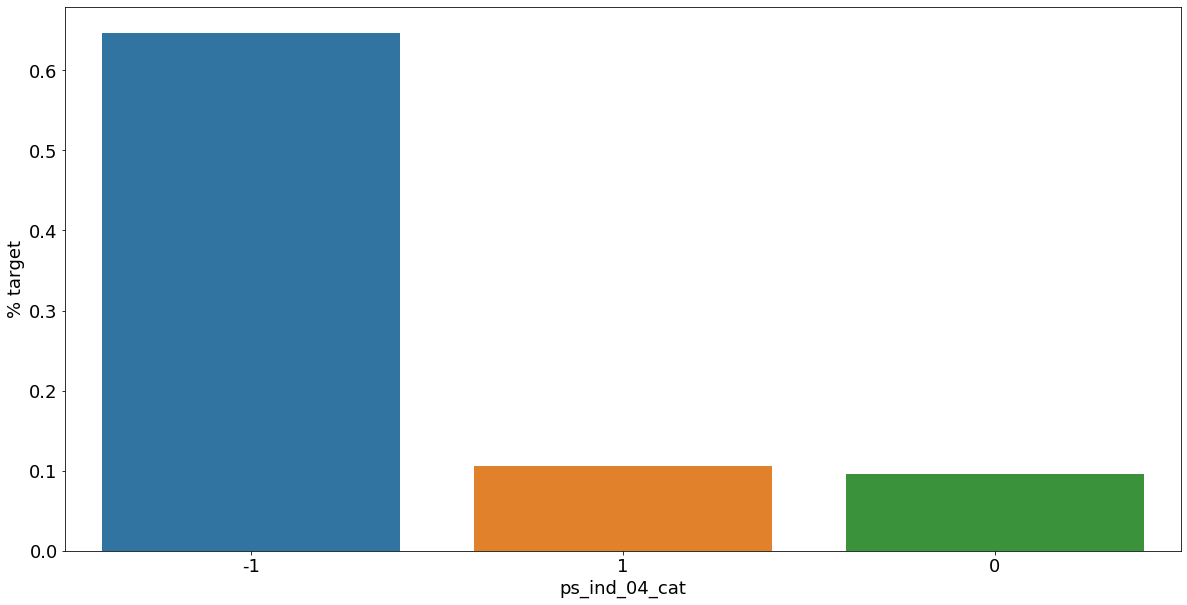

<Figure size 432x288 with 0 Axes>

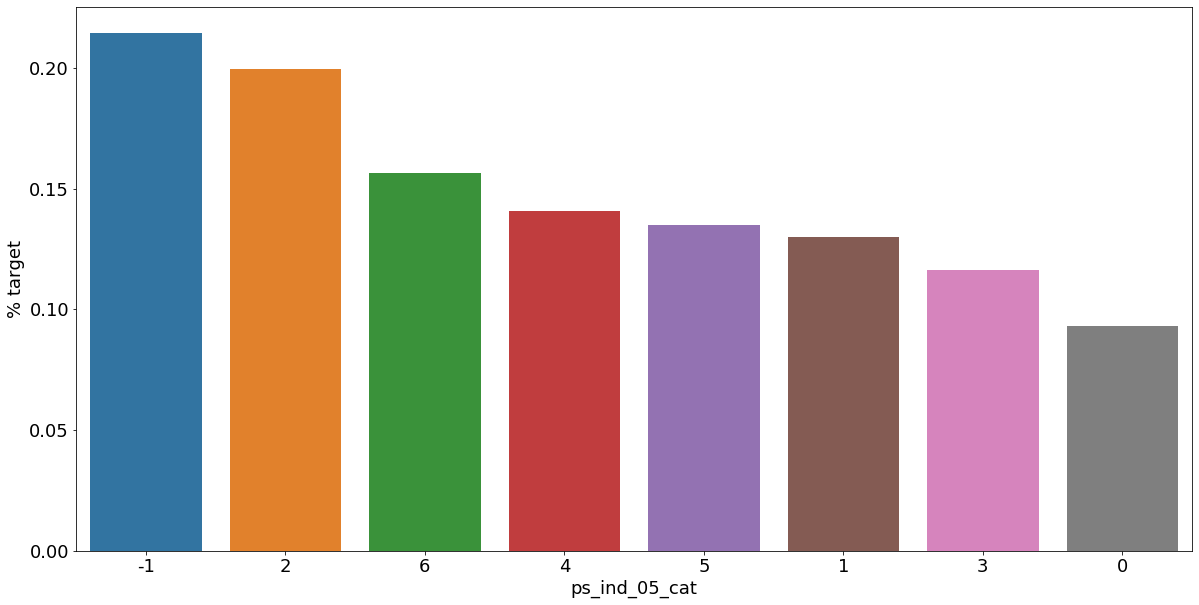

<Figure size 432x288 with 0 Axes>

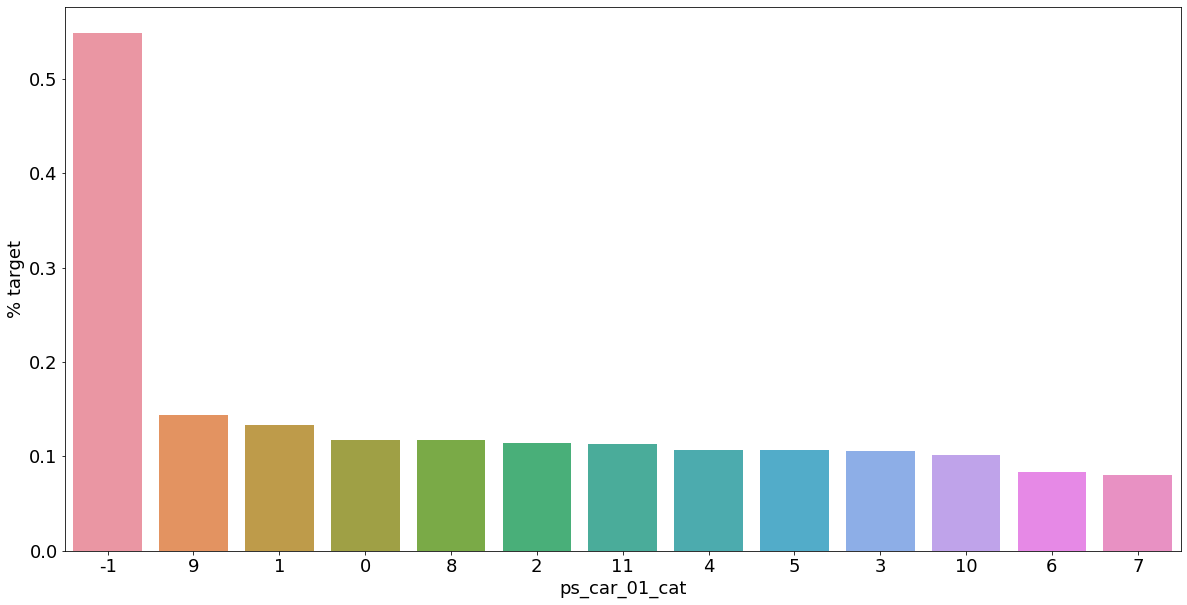

<Figure size 432x288 with 0 Axes>

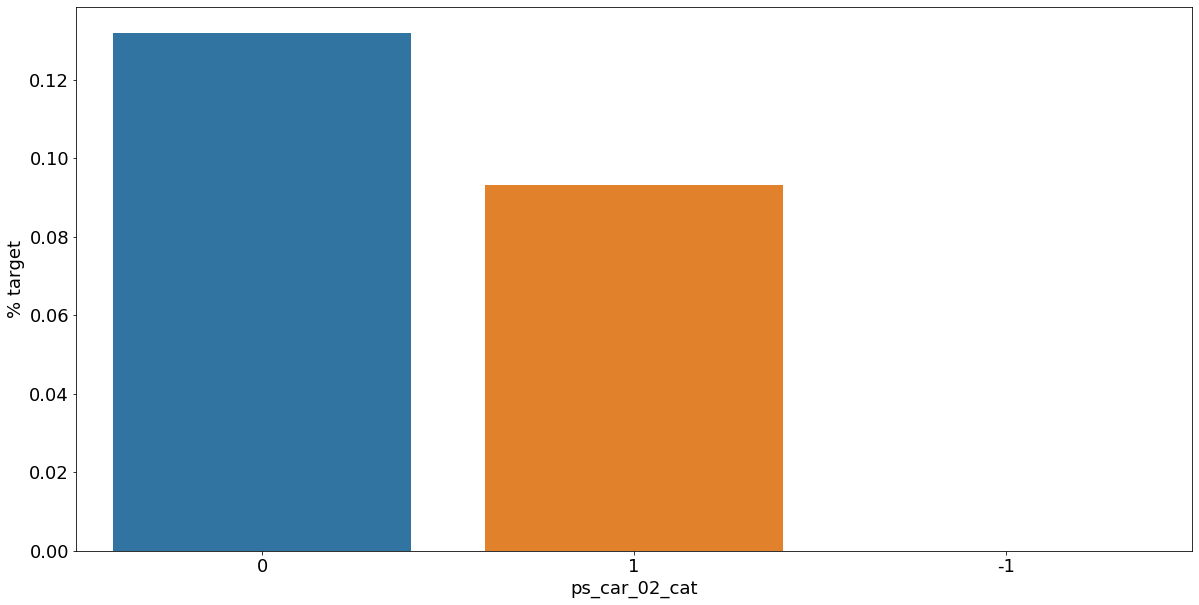

<Figure size 432x288 with 0 Axes>

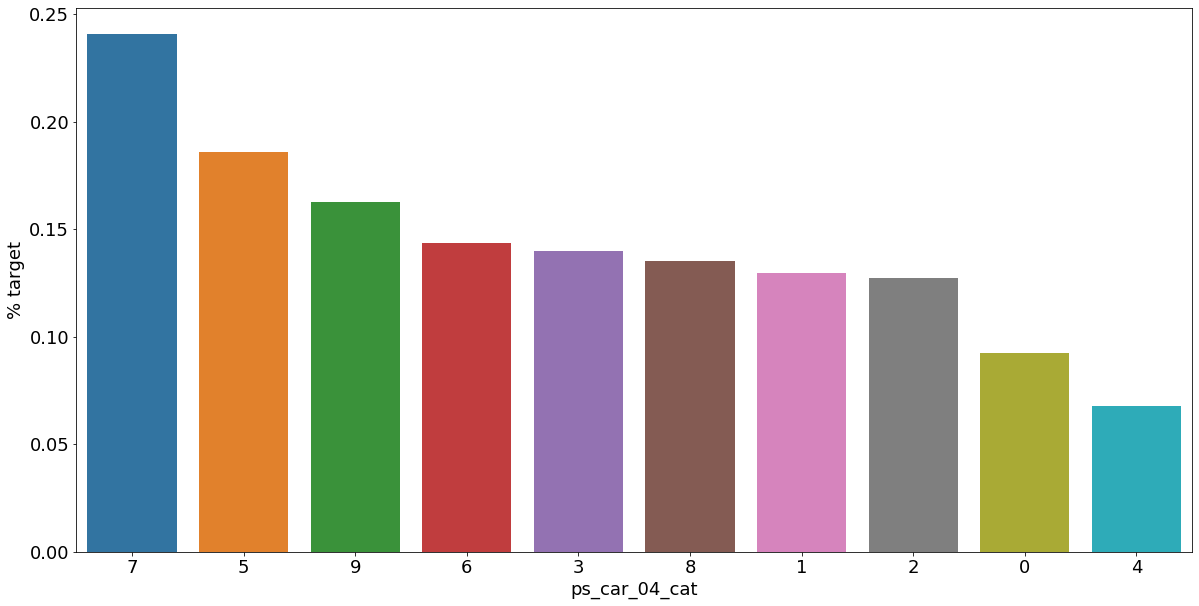

<Figure size 432x288 with 0 Axes>

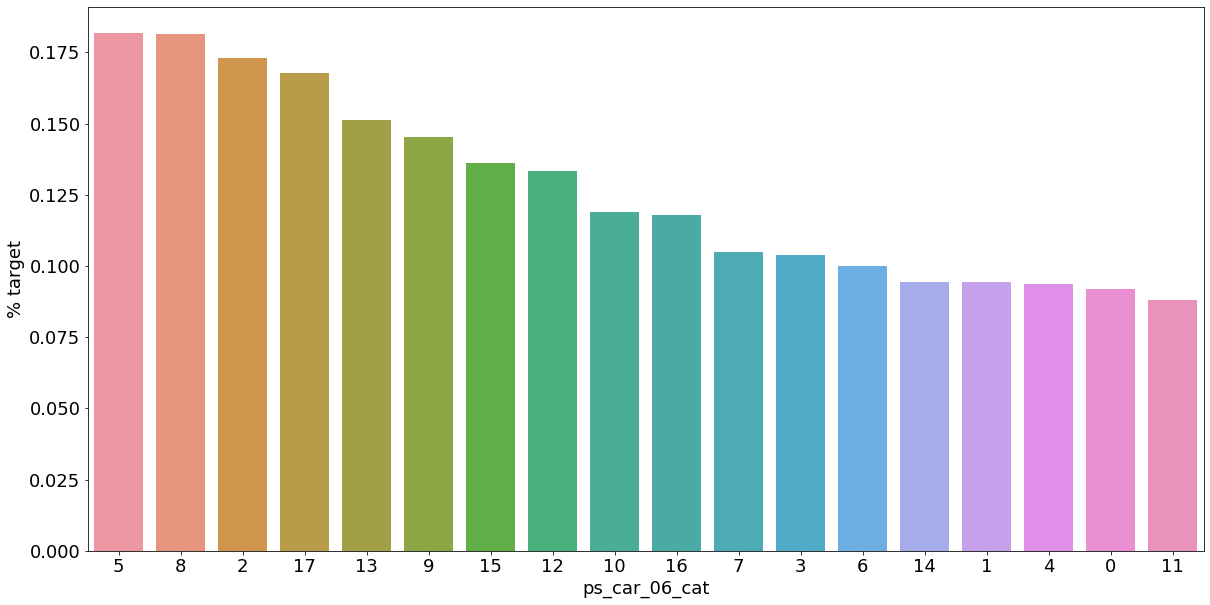

<Figure size 432x288 with 0 Axes>

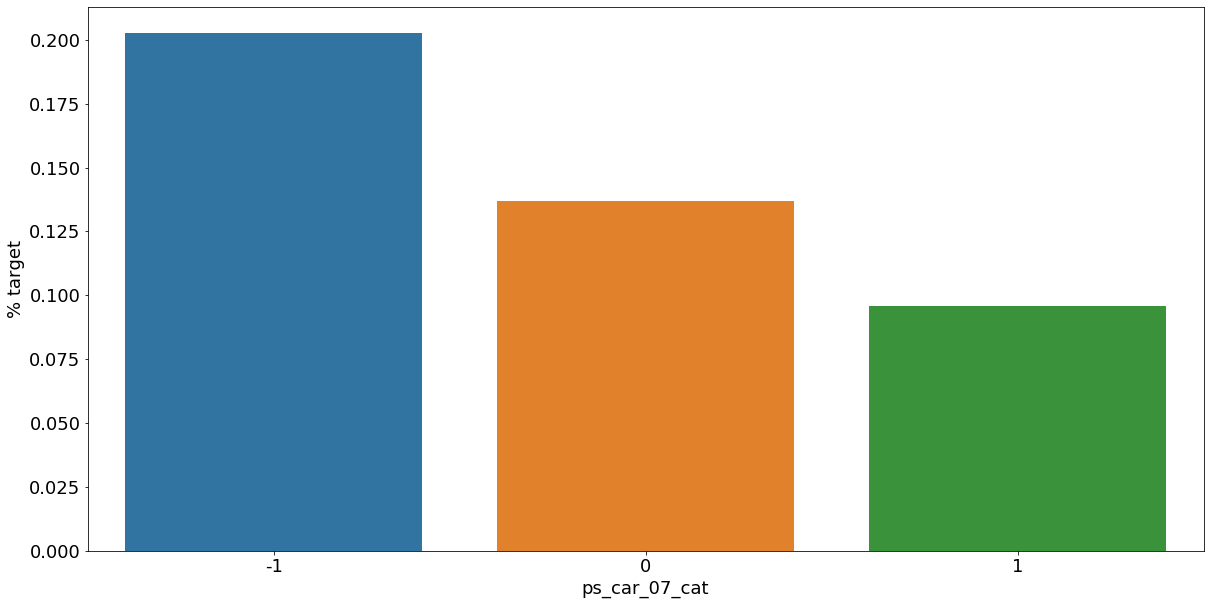

<Figure size 432x288 with 0 Axes>

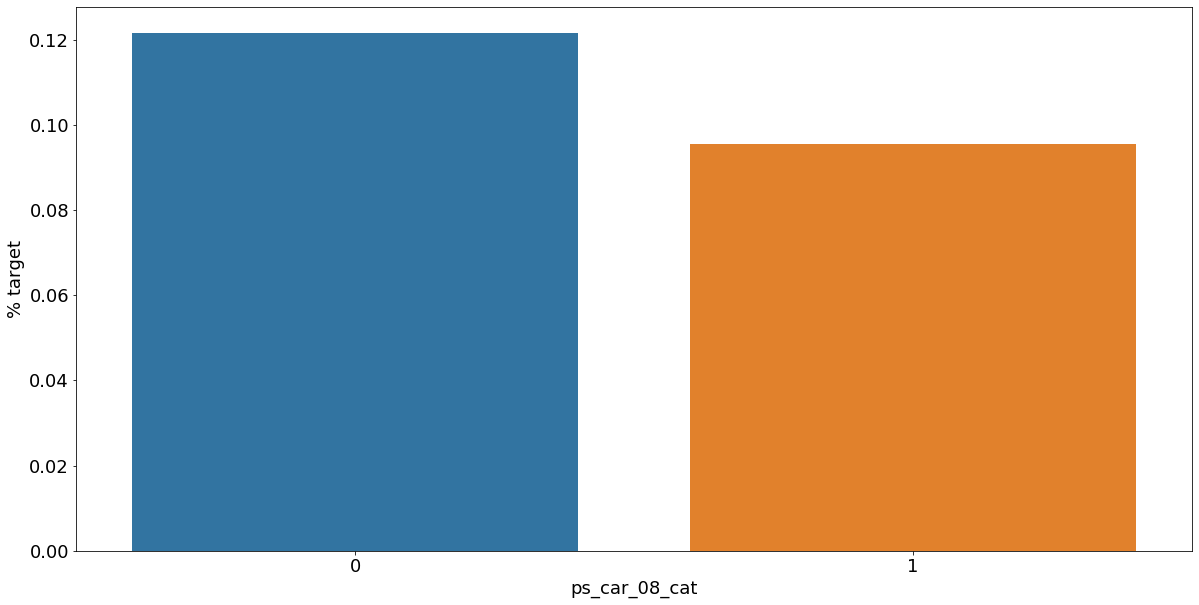

<Figure size 432x288 with 0 Axes>

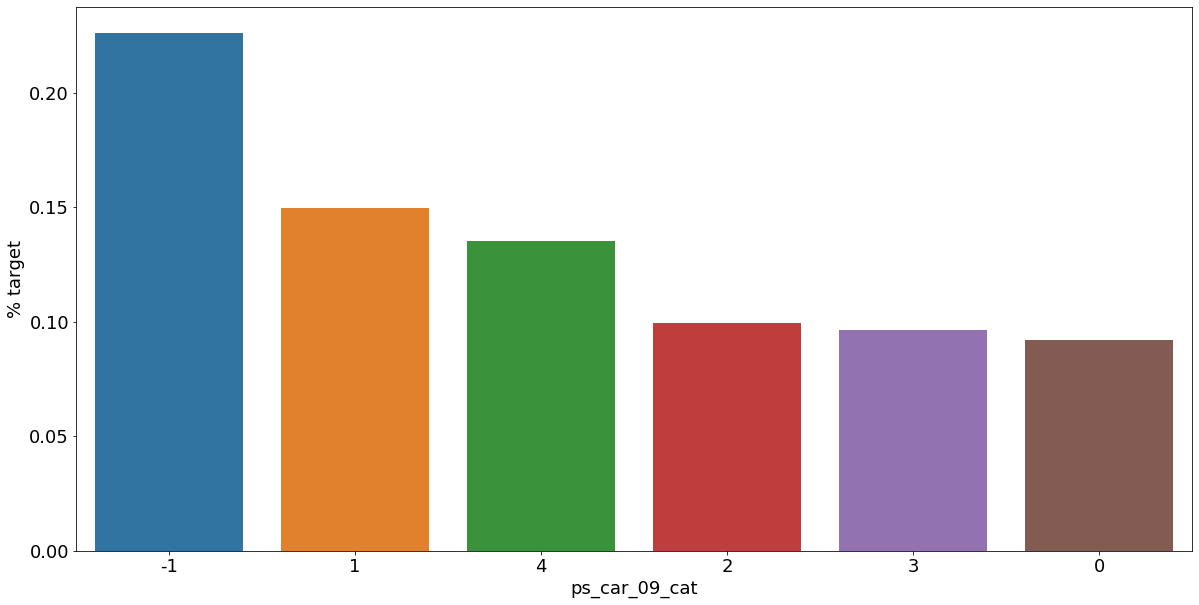

<Figure size 432x288 with 0 Axes>

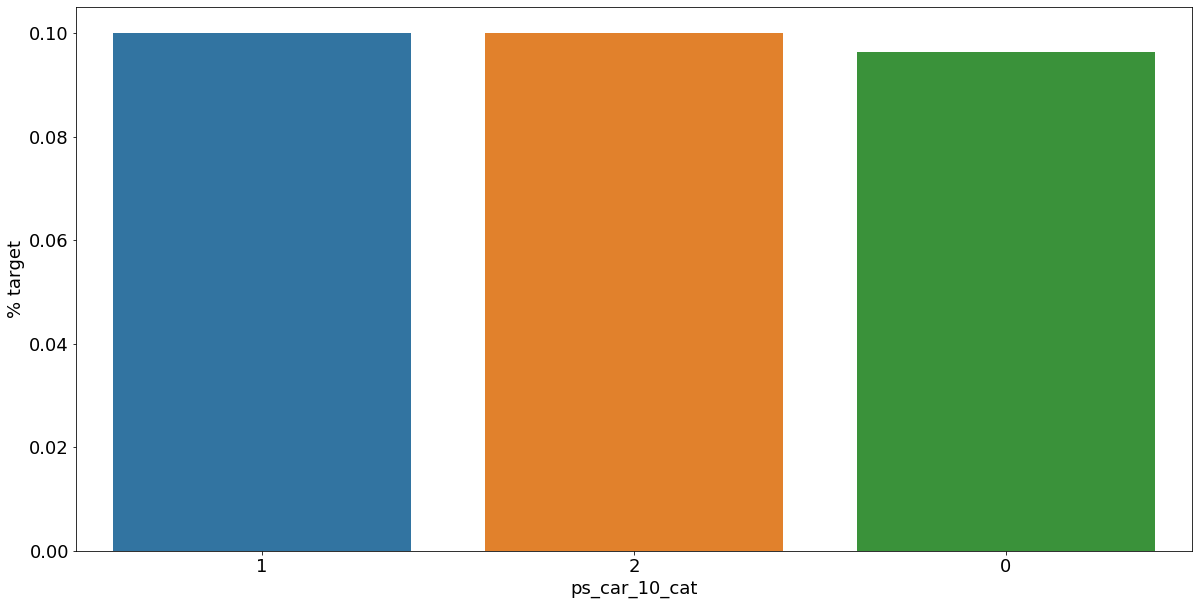

In [32]:
v = meta[(meta.level == 'nominal')& (meta.keep)].index 

for f in v :
    plt.figure()
    fig, ax = plt.subplots(figsize = (20,10))
    
    #각 카테고리 value 별 target = 1의 비율 계산
    # 왜 count가 아니라 mean? 이러니까 ㅈㄴ 헷갈리는데 ㅅㅂ?
    cat_prec = train[[f,'target']].groupby([f],as_index = False).mean()
    cat_prec.sort_values(by = 'target',ascending = False, inplace = True)
    
    #target의 평균값을 기준으로 역순으로 정렬되도록 barplot생성
    sns.barplot(ax =ax,x = f, y ='target',data = cat_prec,order = cat_prec[f])
    plt.ylabel('% target',fontsize = 18)
    plt.xlabel(f, fontsize = 18)
    plt.tick_params(axis = 'both',which = 'major',labelsize = 18)
    plt.show()

In [33]:
# ps_ind_02_cat 의 count()
pd.crosstab(train['ps_ind_02_cat'],train['target'],
           margins= True).style.background_gradient(cmap = 'summer_r')

target,0,1,All
ps_ind_02_cat,,,
-1,63,40,103
1,141696,15428,157124
2,40560,4713,45273
3,9261,1049,10310
4,3666,464,4130
All,195246,21694,216940


In [34]:
 train[['ps_ind_02_cat','target']].groupby(['ps_ind_02_cat'],as_index = False).sum()

,ps_ind_02_cat,target
0,-1,40
1,1,15428
2,2,4713
3,3,1049
4,4,464


In [35]:
print( 40 / 103, )

0.3883495145631068


## Interval Features 

Interval 피처끼리의 상관관계를 살펴보자 

In [36]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # 두 색 사이의 colormap 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})

    plt.show()

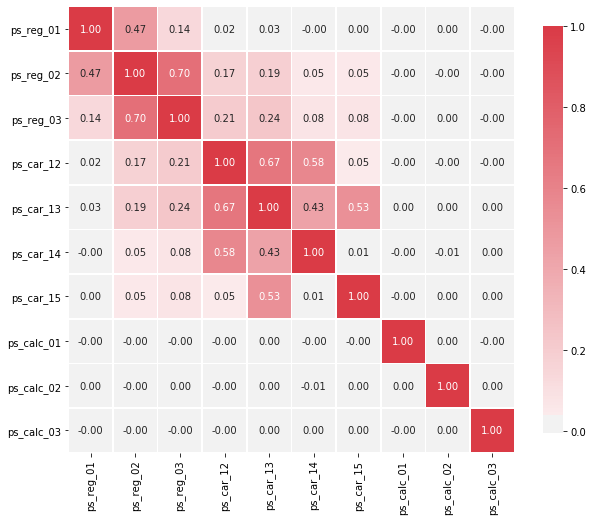

In [37]:
v = meta[(meta.level == 'interval') & (meta.keep)].index 
corr_heatmap(v)

OBSERVATION
다음의 두 개의 피처들은 서로 강한 상관관계를 가진다.
* ps_reg_02와 ps_reg_03 : 0.7
* ps_car_12와 ps_car_13 : 0.67
* ps_car_12와 ps_car_14 : 0.58
* ps_car_13와 ps_car_15 : 0.67

Seaborn은 피처 간 선형적인 관계를 시각화하는 유용한 plot을 제공한다. 그 중 pairplot을 통해 피처간의 관계를 시각화할 수 있다. 하지만 앞서 heatmap으로 피처 간 상관관계를 봤기 때문에 상관관계가 높은 피처들만 봐보자.

> DataFrame.sample(n=None, frac=None) 데이터의 일부를 sampling해 반환
> * n : sampling할 데이터의 개수
> * frac : sampling할 데이터의 비율

In [38]:
# 조금 더 빠르게 하기 위해 일부만 추출
s = train.sample(frac = 0.1)

### ps_reg_02 and ps_reg_03 

회귀선(regression line)은 두 피처 간의 선형적인 관계를 보여준다. hue를 설정함으로써 target ==0 과 target ==1 별로 회귀선을 그릴 수 있다.

> **seaborn.lmplot(x, y, data, hue=None, palette=None, scatter=True, scatter_kws=None)**
* x, y : 피처 이름
* data : 시각화할 DataFrame
* hue : 피처 이름
* palette : hue 피처의 값의 level의 색조합. 자세한 것은 여기 참고
* scatter : scatterplot으로 그릴건지. 기본은 True
* scatter_kws : plt.scatterplot에 넘길 인수들

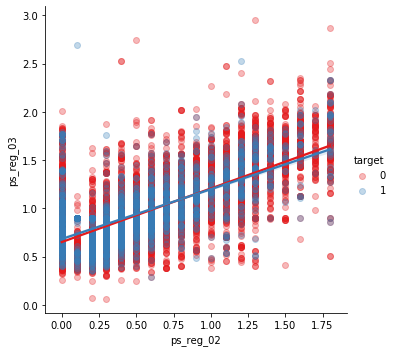

In [39]:
sns.lmplot(x = 'ps_reg_02',y ='ps_reg_03',data = s,hue= 'target',
          palette = 'Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_12 and ps_car_13

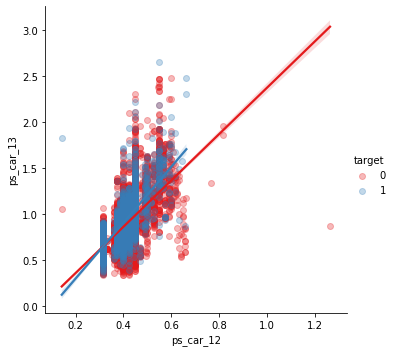

In [40]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target',
           palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_12 and ps_car_14 

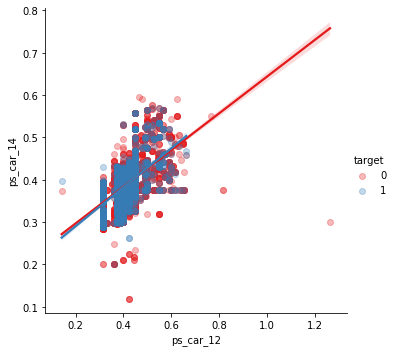

In [41]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target',
           palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

### ps_car_13 and ps_car_15 

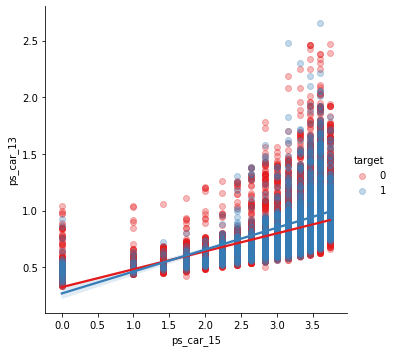

In [42]:

sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target',
           palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

위와 같이 상관관계가 높은 피처들을 볼 수 있었다. 그 다음은 **어떤 피처를 계속 가지고 갈지 결정**해야한다. 이를 위해 **Principal Component Analysis(PCA)** 를 통해 차원을 낮추는 방법이 있다. 여기의 피처들은 상관관계가 꽤 높으므로 heaby-lifting을 해도 괜찮다

## Checking the Correlations between ordinal variables 

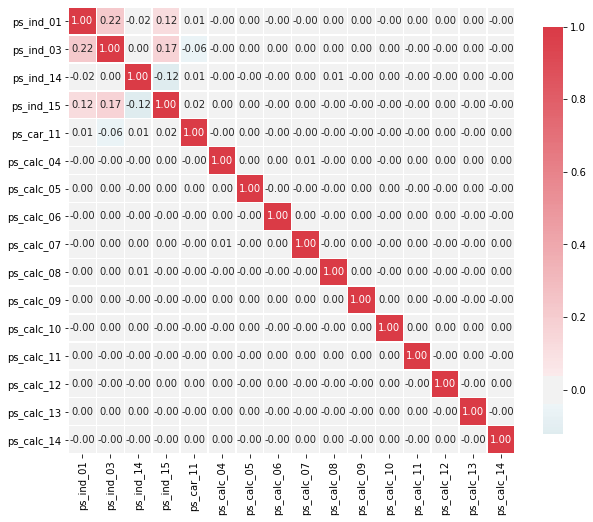

In [43]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index 
corr_heatmap(v)

ordinal한 피처의 경우 큰 상관관계를 가지는 피처는 없다. 

# Feature Engineering 

## Creating Dummy Features 

categorical 피처의 값은 어떤 크기나 순서를 나타내지 않는다. 예를 들면, 카테고리 2번은 카테고리 1번의 값의 2 배가 아니다.

그러므로 우리는 **dummy variables**를 만들어야 한다. 하지만 상관관계가 높은 dummy variable이 발생하는 dummy trap 문제를 막기 위해 첫번째 dummy variable을 제거한다.  
ex) **여자/ 남자** 성별 피처의 dummy variable을 만든다고 할 때 여자 {0,1} 그리고 남자{0,1} 인 2개의 피처를 생성한다.  
하지만 **여자/남자**의 경우 단순히 기준을 여자로 둘 때 1이면 여자이고 0이면 남자임을 알 수 있다. 즉, 하나의 피처가 다른 피처에 의해 충분히 추측이 가능하다. 그 말은 즉 상관관계가 높은 피처가 생겼다는 것이고 이를 방지하기 위해 하나의 dummy 피처를 그냥 제거해준다.   
https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/

In [44]:
v = meta[(meta.level == 'nominal')& (meta.keep)].index 
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns = v ,drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


## Creating Interaction Features

numerical feature의 경우 **입력값 x를 다항식으로 변환**하여 각 특성의 거듭제곱을 새로운 피처로 생성하는 PolynomialFeatures를 사용한다. 이렇게 하면 두 interval feature간의 interaction을 표현할 수 있다.

> **class sklearn.preprocessing.PolynomialFeatures(degree=2, **, interaction_only=False, include_bias=True)**
* degree : 차수
* interaction_only : True면 제곱은 빼고, 서로x끼리 상호작용만
* include_bias : 상수항 생성 여부

In [45]:
v = meta[(meta.level =='interval')&(meta.keep)].index 

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data = poly.fit_transform(train[v]),columns=poly.get_feature_names(v))

#원래 피처 제거
interactions.drop(v,axis = 1, inplace = True)

#train 데이터에 interaction 피처 추가
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
#concat 데이터 프레임 병합 
train = pd.concat([train,interactions],axis = 1)
print('After creating interactions we have {} variables in train'.format(train.shape[1])) 

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


In [46]:
v = meta[(meta.level =='interval')&(meta.keep)].index 

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data = poly.fit_transform(train[v]),columns=poly.get_feature_names(v))

interactions 
# Q. 마이너스 값이 껴있으면 어떻게 표시하지? 둘중 누가 마이너스인가. 혹은 두 값 다 마이너스였다면?

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.6,0.6,0.838153,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00
1,0.9,0.6,0.728440,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36
2,0.9,0.6,0.869267,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,0.81,0.54,0.782340,0.360000,0.732844,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01
3,0.6,1.5,1.705872,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,0.36,0.90,1.023523,0.240000,0.503032,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01
4,0.8,0.8,1.086566,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,0.64,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,1.180625,0.434626,0.984186,0.418151,3.917668,0.651939,0.543283,0.977909,0.160,0.362311,0.153935,1.442221,0.240000,0.200000,0.360000,0.820432,0.348577,3.265825,0.543466,0.452888,0.815199,0.1481,1.387552,0.230903,0.192419,0.346354,13.0,2.163331,1.802776,3.244996,0.36,0.30,0.54,0.25,0.45,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,0.6,0.4,1.537652,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,0.36,0.24,0.922591,0.254558,0.761467,0.230825,1

# Feature Selection

## Removing Features with low or zero

분산(variance)가 낮거나 아에 없는 피처들을 제거하는 단계이다. Sklearn에서는 기본적으로 영분산(zero variance)를 제거하는 VarianceThreshold 함수를 제공한다.
하지만 여기서는 앞에서 봤다 싶이 영분산인 피처가 없으므로 적용하지 않는다. 하지만, **분산이 1%도 안 되는 분산을 제거할 것이고 총 31개의 피처가 제거된다.**

In [47]:
# id와 target을 제외하고 계산
selector  = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id','target'],axis = 1))

# boolean 값들을 반전시키는 함수
# 이게 뭔 소리?
f = np.vectorize(lambda x : not x)

#variance가 낮은 column들 추출
v  =train.drop(['id','target'],axis = 1).columns[f(selector.get_support())]
print("{} variables have too low variance.end=".format(len(v)))
print("These variables are {}".format(list(v)))

28 variables have too low variance.end=
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


(selector.get_support()   
뭐하는 함수인가?   
 
분산(variance)를 기준으로 꽤 많은 피처들을 제거했다. 만약 피처가 정말 많은 데이터셋이라면 위의 방법이 처리 시간을 줄여줄 수 있다.

Sklearn에서는 또한 feature selection 함수를 제공한다. 그 중 하나가 SelectFromModel 함수인데 이 함수는 분류기(classifier)가 최적의 피처를 선택해 학습하도록 한다. 아래는 이를 Random Forest에 적용한 것이다.


## Selecting Features with a RandomForest and SelectFromModel 

SelectionFromModel로 몇 개의 피처들을 갖고 갈건지 결정할 수 있다. 또한 feature importance의 정도에 따라 경계(threshold)를 정할 수 있다. 하지만 우리는 단순하게 상위 50%의 최적의 피처만 사용할 것이다.

In [48]:
X_train = train.drop(['id','target'],axis= 1)
y_train = train['target']

feat_labels = X_train.columns #피처들의 이름

rf =RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)

In [49]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_ 

indices = np.argsort(rf.feature_importances_)[::-1] #역으로 정렬

for f in range(X_train.shape[1]) :
    # "%2d) %-*s %f"이거 뭘까/ 걍 입력 똑바로 되라고 하는 것 같긴 한데
    print("%2d) %-*s %f" %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


 1) ps_car_11_cat_te               0.021229
 2) ps_car_13                      0.017339
 3) ps_car_13^2                    0.017248
 4) ps_car_12 ps_car_13            0.017203
 5) ps_car_13 ps_car_14            0.017103
 6) ps_reg_03 ps_car_13            0.017082
 7) ps_reg_01 ps_car_13            0.016850
 8) ps_car_13 ps_car_15            0.016770
 9) ps_reg_03 ps_car_14            0.016209
10) ps_reg_03 ps_car_12            0.015583
11) ps_reg_03 ps_car_15            0.015126
12) ps_car_14 ps_car_15            0.015002
13) ps_reg_01 ps_reg_03            0.014752
14) ps_reg_02 ps_car_13            0.014745
15) ps_car_13 ps_calc_01           0.014731
16) ps_car_13 ps_calc_02           0.014706
17) ps_car_13 ps_calc_03           0.014686
18) ps_reg_01 ps_car_14            0.014330
19) ps_reg_03                      0.014282
20) ps_reg_03^2                    0.014172
21) ps_reg_03 ps_calc_02           0.013794
22) ps_reg_03 ps_calc_03           0.013767
23) ps_reg_03 ps_calc_01        

SelectFromModel을 통해 우리는 어떤 미리 피팅된 분류기를 사용할건지, feature importance의 경계를 어디에 둘건지 설정할 수 있다. 또한 get_support 함수로 train 데이터의 피처 개수를 제한할 수도 있다

In [50]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'. format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection : {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection : 81


In [51]:
train = train[selected_vars + ['target']]

# Feature Scaling

In [52]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'],axis = 1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])